In [3]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("online.CSV")

In [5]:
df.head()

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435


In [6]:
df.drop(columns=["Unnamed: 0","9","#@%","Unnamed: 13","latitude","longitude"],inplace=True)

In [7]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
Marital Status                 0
Gender                         0
employment_status              0
Family size                   19
Reviews                        0
Pin code                       0
Age                           19
Educational Qualifications     0
dtype: int64

<Axes: ylabel='Age'>

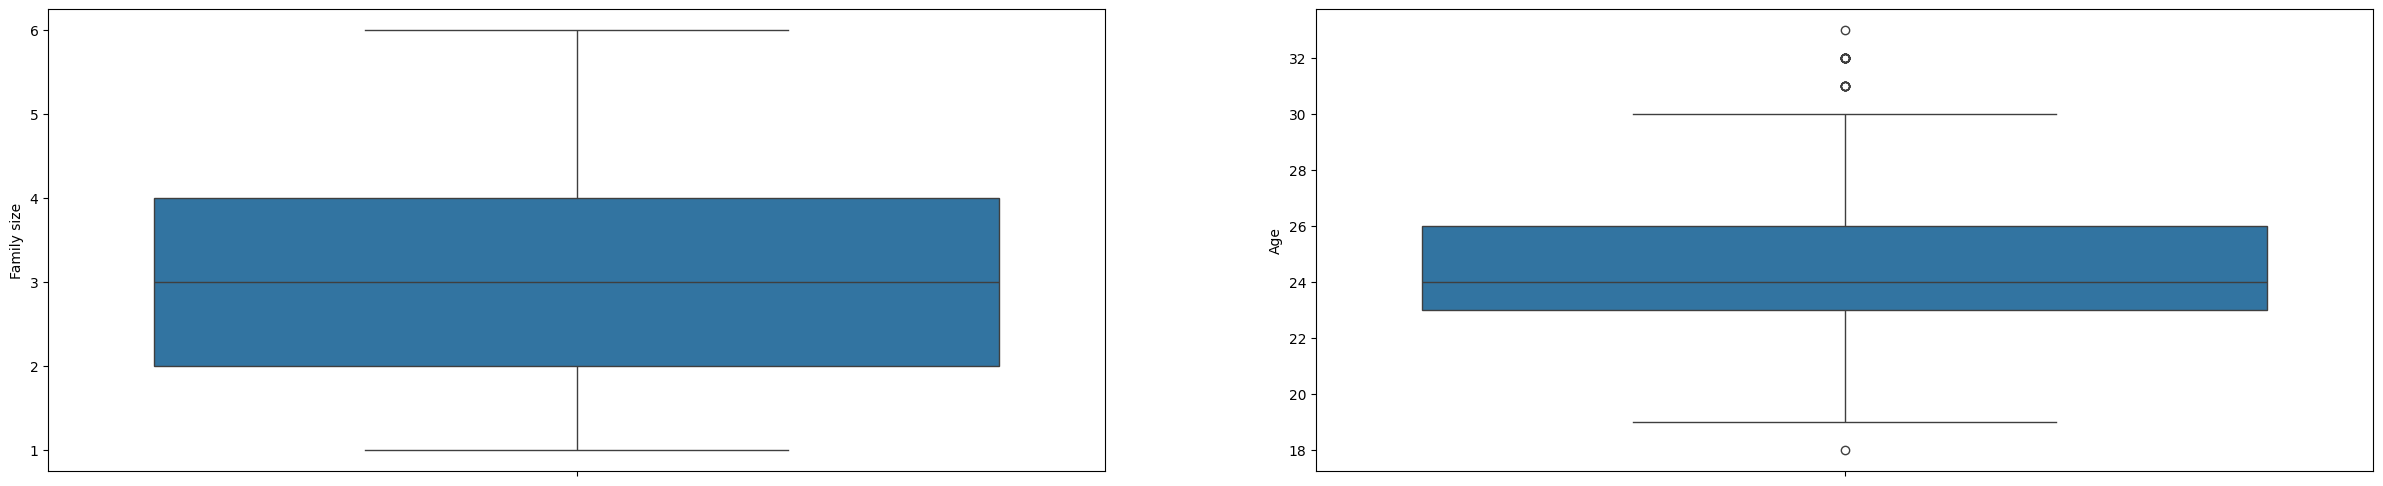

In [8]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.boxplot(df["Family size"])
plt.subplot(1,2,2)
sns.boxplot(df["Age"])


In [9]:
mean_value=int(df["Family size"].mean())
df["Family size"]=df["Family size"].fillna(mean_value)

In [10]:
median_value=int(df["Age"].median())
df["Age"]=df["Age"].fillna(median_value)

In [11]:
df.head(1)

,order_status,Monthly Income,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,Educational Qualifications
0,Yes,25001 to 50000,Married,Male,Employee,5.0,Positive,560045,28.0,Post Graduate


<Axes: ylabel='Pin code'>

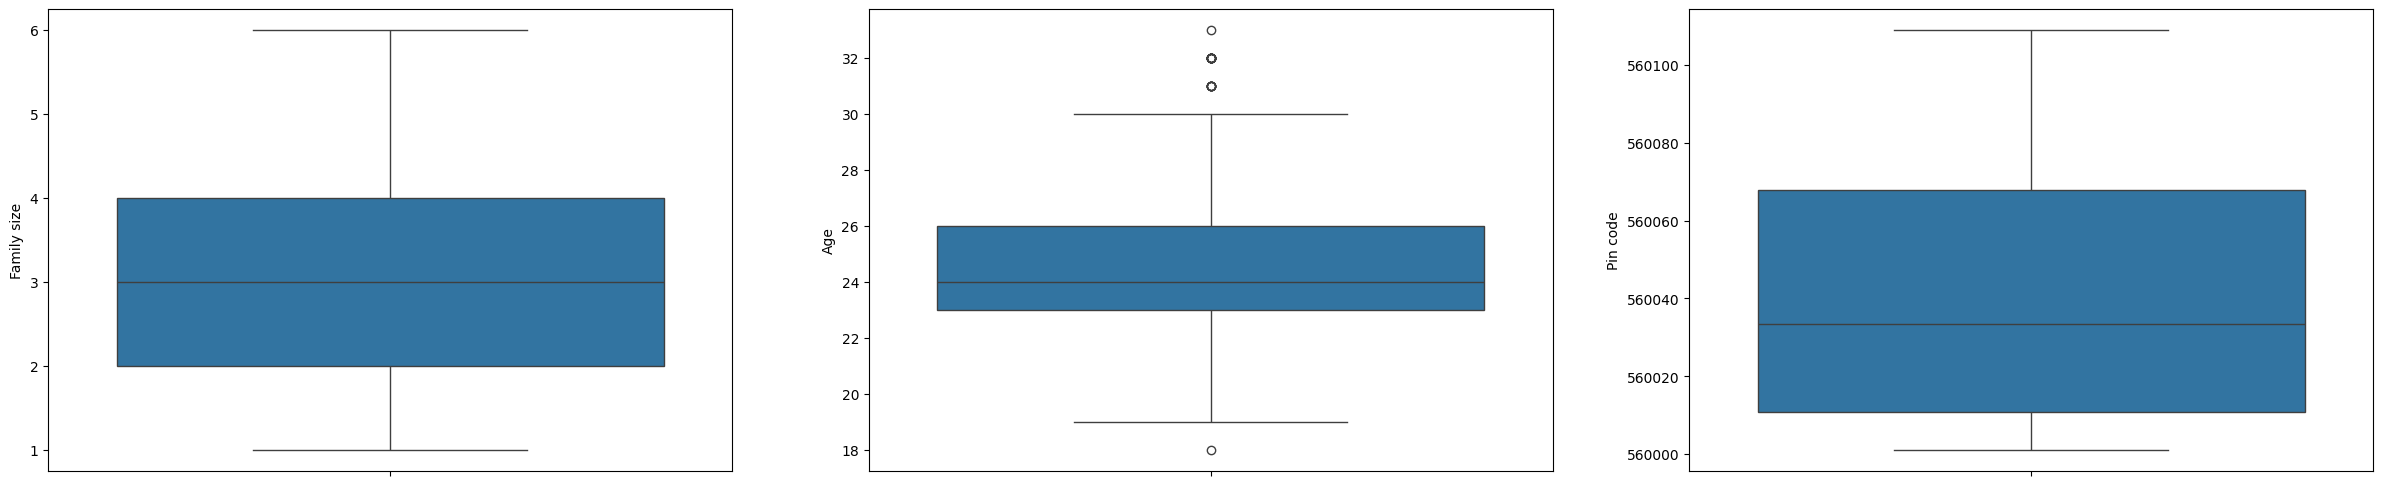

In [12]:
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
sns.boxplot(df["Family size"])
plt.subplot(1,3,2)
sns.boxplot(df["Age"])
plt.subplot(1,3,3)
sns.boxplot(df["Pin code"])


In [13]:
#IQR
q1=df.describe()["Age"]["25%"]
q3=df.describe()["Age"]["75%"]
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
df["Age"]=df["Age"].clip(lower_limit,upper_limit)

In [14]:
df.head()

,order_status,Monthly Income,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,Educational Qualifications
0,Yes,25001 to 50000,Married,Male,Employee,5.0,Positive,560045,28.0,Post Graduate
1,Yes,No Income,Single,Male,Student,3.0,Positive,560009,24.0,Post Graduate
2,Yes,No Income,Single,Female,Student,3.0,Positive,560009,24.0,Post Graduate
3,Yes,No Income,Single,Female,Student,3.0,Positive,560003,24.0,Post Graduate
4,Yes,More than 50000,Married,Male,Self Employeed,3.0,Positive,560015,24.0,School


In [15]:
df.drop(columns=["Pin code"],inplace=True)

In [16]:
df.head(10)

,order_status,Monthly Income,Marital Status,Gender,employment_status,Family size,Reviews,Age,Educational Qualifications
0,Yes,25001 to 50000,Married,Male,Employee,5.0,Positive,28.0,Post Graduate
1,Yes,No Income,Single,Male,Student,3.0,Positive,24.0,Post Graduate
2,Yes,No Income,Single,Female,Student,3.0,Positive,24.0,Post Graduate
3,Yes,No Income,Single,Female,Student,3.0,Positive,24.0,Post Graduate
4,Yes,More than 50000,Married,Male,Self Employeed,3.0,Positive,24.0,School
5,Yes,No Income,Single,Female,Student,2.0,Positive,22.0,Graduate
6,Yes,More than 50000,Married,Male,Employee,6.0,Positive,25.0,Post Graduate
7,No,25001 to 50000,Single,Female,Self Employeed,3.0,Negative,24.0,Post Graduate
8,Yes,10001 to 25000,Married,Male,Self Employeed,3.0,Negative,22.0,School
9,Yes,No Income,Single,Male,Student,2.0,Positive,24.0,Graduate


In [17]:
df["Marital Status"].value_counts()

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [18]:
d2={"No Income":0,"25001 to 50000":1,"More than 50000":2,"10001 to 25000":3,"Below Rs.10000":4}
df["Monthly Income"]=df["Monthly Income"].map(d2)
 

In [19]:
d1={"Yes":1,"No":0}
df["order_status"]=df["order_status"].map(d1)

In [20]:
df.head(10)

,order_status,Monthly Income,Marital Status,Gender,employment_status,Family size,Reviews,Age,Educational Qualifications
0,1,1,Married,Male,Employee,5.0,Positive,28.0,Post Graduate
1,1,0,Single,Male,Student,3.0,Positive,24.0,Post Graduate
2,1,0,Single,Female,Student,3.0,Positive,24.0,Post Graduate
3,1,0,Single,Female,Student,3.0,Positive,24.0,Post Graduate
4,1,2,Married,Male,Self Employeed,3.0,Positive,24.0,School
5,1,0,Single,Female,Student,2.0,Positive,22.0,Graduate
6,1,2,Married,Male,Employee,6.0,Positive,25.0,Post Graduate
7,0,1,Single,Female,Self Employeed,3.0,Negative,24.0,Post Graduate
8,1,3,Married,Male,Self Employeed,3.0,Negative,22.0,School
9,1,0,Single,Male,Student,2.0,Positive,24.0,Graduate


In [21]:
df=pd.get_dummies(df,columns=["Marital Status","employment_status","Gender"],dtype="int64",drop_first=True)

In [22]:
df["Reviews"].value_counts()

Reviews
Positive     317
Negative      71
Name: count, dtype: int64

In [23]:
d3={"Positive":1,"Negative ":0}
df["Reviews"]=df["Reviews"].map(d3)

In [24]:
df["Educational Qualifications"].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [25]:
d4={"Graduate":2,"Uneducated":0,"School":1,"Post Graduate":3,"Ph.D":4}
df["Educational Qualifications"]=df["Educational Qualifications"].map(d4)

In [26]:
#seperate dependent and independent
X=df.drop(columns=["order_status"])
y=df["order_status"]

In [27]:
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: order_status, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Md zameer khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=log.predict(X_test)

In [33]:
# y_pred will be compared with y_test to check the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score, classification_report

In [34]:
confusion_matrix(y_pred,y_test)

array([[ 7,  3],
       [ 8, 60]])

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.95      0.88      0.92        68

    accuracy                           0.86        78
   macro avg       0.71      0.79      0.74        78
weighted avg       0.89      0.86      0.87        78



In [36]:
accuracy_score(y_pred,y_test)

0.8589743589743589